## Notebook 3 - Putting the Data in Data Science

Almost anyone can fit a model to 9 data points. Right?

In [1]:
import sys
sys.version

'3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]'

In [2]:
import random
random.seed(31415)
x = list(range(-4, 5))
y = [random.gauss() for xi in x]  # random.gauss() gives noise in N(0,1)
list(zip(x,y))

[(-4, -0.6864830288935337),
 (-3, -0.4355770459575272),
 (-2, 0.21997288705562715),
 (-1, -0.19657760724998638),
 (0, -1.0296009422002177),
 (1, -0.1684060358725388),
 (2, -0.2976008343067326),
 (3, -1.4336927432634707),
 (4, -0.13069143222444116)]

In [3]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

def fit_OLS(x,y):
  # Build a DataFrame for statsmodels
  df = pd.DataFrame({
      "x": x,
      "y": y
  })

  # Add intercept term automatically
  df = sm.add_constant(df)

  # Fit OLS:  y ~ β0 + β1*x
  model = sm.OLS(df["y"], df[["const", "x"]])
  results = model.fit()

  #print(results.summary())

  # Predict using the fitted model
  y_pred_sm = results.predict(df[["const", "x"]])

  # ---- Extract coefficients ----
  b0 = results.params["const"]
  b1 = results.params["x"]

  # Format equation nicely
  eqn = f"ŷ = {b0:.3f} + {b1:.3f}·x"


  # Plot
  plt.scatter(df["x"], df["y"], label="data")
  plt.plot(df["x"], y_pred_sm, color="orange", label="Statsmodels OLS")

  # Add formula onto plot
  plt.text(
      0.05, 0.95, eqn,
      transform=plt.gca().transAxes,
      fontsize=12,
      verticalalignment='top',
      bbox=dict(facecolor="white", alpha=0.8, edgecolor="none")
  )


  plt.legend()
  plt.grid(True)
  plt.title("Statsmodels OLS Regression")
  plt.show()

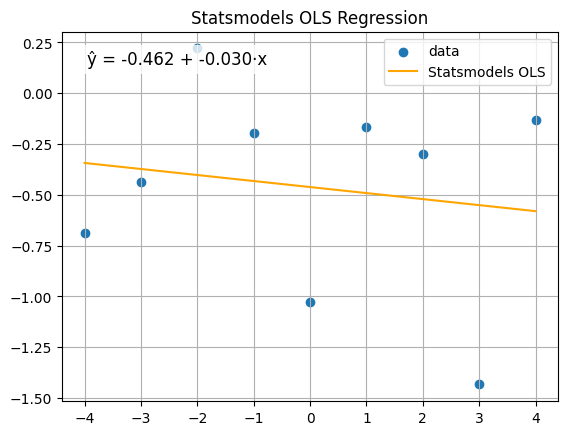

In [4]:
fit_OLS(x,y)

*Almost anyone can fit a model to 9 data points. Right?*

Ok maybe not!

But what if it was 9000 data points not 9?

In [5]:
import random
random.seed(31415)
x = list(range(-4500, 4500))
y = [(5000**2-xi**2)**(0.5)*random.gauss() for xi in x]  # random.gauss() gives noise in N(0,1)
xy = list(zip(x,y))
len(xy)

9000

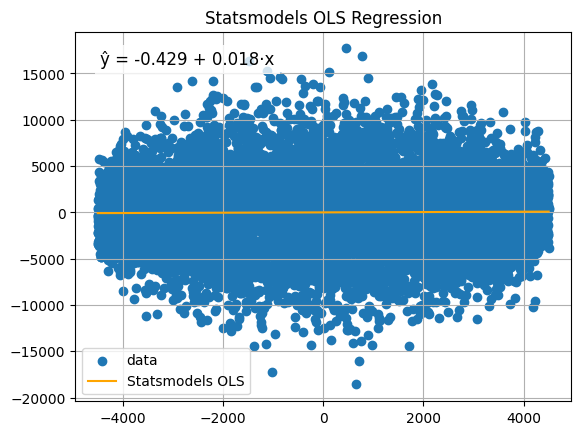

In [6]:
fit_OLS(x,y)

In [7]:
df = pd.DataFrame(xy, columns=["x","y"])

In [8]:
df.head(5)

,x,y
0,-4500,-1496.155075
1,-4499,-950.216991
2,-4498,480.327106
3,-4497,-429.646478
4,-4496,-2252.446853


In [9]:
df.tail(5)

,x,y
8995,4495,31.401924
8996,4496,3948.642847
8997,4497,-3850.598876
8998,4498,335.731418
8999,4499,451.119405


**Question:** How do we work with datasets of actual data, in the range of thousands -- millions, even *billions* -- of rows?